In [68]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def unsharp_mask(image, kernel_size=(9, 9), sigma=2.0, amount=2.0, threshold=0):
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [70]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids

In [71]:
im_in_actual = cv.imread("C:\\SteamCondChamber\\imagesM26C10V25T38P418\\image_0.tif")
frame_rate = 0

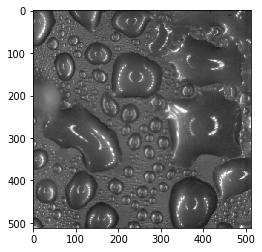

In [72]:
#print(im_in_actual)
plt.imshow(im_in_actual)
plt.show()

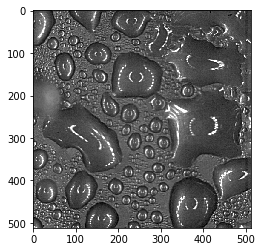

In [73]:
im_in_sharp = unsharp_mask(im_in_actual, kernel_size=(9, 9), sigma=2.0, amount=2.0, threshold=0)
plt.imshow(im_in_sharp )
plt.show()
#cv.imwrite(f"sharp,9,9,2,2.tif", a)

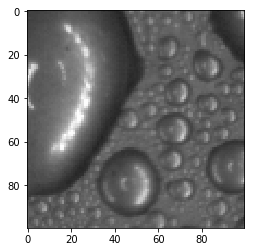

In [74]:
crop = im_in_actual[0:100, 0:100]
plt.imshow(crop)
plt.show()

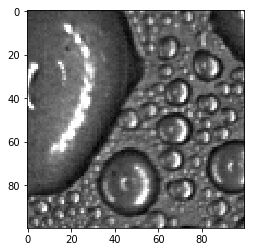

In [75]:
crop_sharp = unsharp_mask(crop, kernel_size=(9, 9), sigma=2.0, amount=2.0, threshold=0)
plt.imshow(crop_sharp)
plt.show()

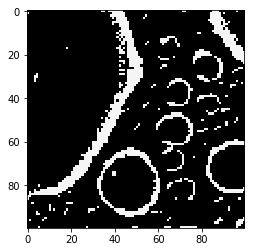

In [76]:
th, crop_sharp_th = cv.threshold(crop_sharp, 50, 245, cv.THRESH_BINARY_INV);
plt.imshow(crop_sharp_th)
plt.show()

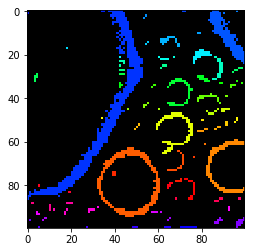

In [78]:
crop_sharp_th = cv.cvtColor(crop_sharp_th, cv.COLOR_BGR2GRAY)
components, nlabels, labels, stats, centroids = CC(crop_sharp_th)
plt.imshow(components)
plt.show()

In [83]:
final_stats = []
final_centroids = []
f_stat_counter = 0
for i in range(stats.shape[0]):
    if (stats[i][0] < 5) or (stats[i][1] < 5) or (stats[i][2] < 10) or (stats[i][3] < 10):
        pass
    else:
        final_stats.append(stats[i])
        final_centroids.append(centroids[i])
FStats = np.array(final_stats, dtype=object)
FCentr = np.array(final_centroids, dtype=object)
print(FStats)
print(FCentr)
#int()

[[64 31 12 13 40]
 [59 47 17 19 71]
 [82 59 18 25 93]
 [32 63 29 32 192]]
[[69.6 36.85]
 [67.7605633802817 54.54929577464789]
 [89.44086021505376 70.95698924731182]
 [47.078125 78.25520833333333]]


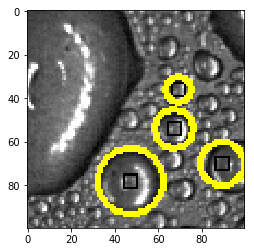

In [88]:
X_list = []
Y_list = []
R_list = []
out = crop_sharp
for row in range(FCentr.shape[0]):
    X = int(FCentr[row][0])
    X_list.append(X)
    Y = int(FCentr[row][1])
    Y_list.append(Y)
    R = int(((FStats[row][2] + FStats[row][3]) / 4))
    R_list.append(R)
    cv.rectangle(out, (int(X) - 3, int(Y) - 3), (int(X) + 3, int(Y) + 3), (0, 0, 0))
    #cv.putText(out, ('%d' % (row + 1)), (X, Y), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv.circle(out, (X, Y), R, (255, 255, 0, 4), 2)
plt.imshow(out)
plt.show()